In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/num-handwritten-classifier/Validation_data/num3/img004-031.png
/kaggle/input/num-handwritten-classifier/Validation_data/num3/img004-038.png
/kaggle/input/num-handwritten-classifier/Validation_data/num3/img004-040.png
/kaggle/input/num-handwritten-classifier/Validation_data/num3/img004-034.png
/kaggle/input/num-handwritten-classifier/Validation_data/num3/img004-033.png
/kaggle/input/num-handwritten-classifier/Validation_data/num3/img004-032.png
/kaggle/input/num-handwritten-classifier/Validation_data/num3/img004-037.png
/kaggle/input/num-handwritten-classifier/Validation_data/num3/img004-035.png
/kaggle/input/num-handwritten-classifier/Validation_data/num3/img004-036.png
/kaggle/input/num-handwritten-classifier/Validation_data/num3/img004-039.png
/kaggle/input/num-handwritten-classifier/Validation_data/num9/img010-034.png
/kaggle/input/num-handwritten-classifier/Validation_data/num9/img010-038.png
/kaggle/input/num-handwritten-classifier/Validation_data/num9/img010-036.png

In [2]:
import os

train_data_dir = '/kaggle/input/num-handwritten-classifier/Training_data'
# List available folders in the training data directory
for digit in range(10):
    digit_dir = os.path.join(train_data_dir, f'num{digit}')
    if os.path.exists(digit_dir):
        print(f"Found directory: {digit_dir}")
    else:
        print(f"Directory not found: {digit_dir}")


Found directory: /kaggle/input/num-handwritten-classifier/Training_data/num0
Found directory: /kaggle/input/num-handwritten-classifier/Training_data/num1
Found directory: /kaggle/input/num-handwritten-classifier/Training_data/num2
Found directory: /kaggle/input/num-handwritten-classifier/Training_data/num3
Found directory: /kaggle/input/num-handwritten-classifier/Training_data/num4
Found directory: /kaggle/input/num-handwritten-classifier/Training_data/num5
Directory not found: /kaggle/input/num-handwritten-classifier/Training_data/num6
Found directory: /kaggle/input/num-handwritten-classifier/Training_data/num7
Found directory: /kaggle/input/num-handwritten-classifier/Training_data/num8
Found directory: /kaggle/input/num-handwritten-classifier/Training_data/num9


In [3]:
import numpy as np
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def load_data(data_dir):
    images = []
    labels = []
    for digit in range(10):  # Digits from 0 to 9
        digit_dir = os.path.join(data_dir, f'num{digit}')
        if os.path.exists(digit_dir):  
            for filename in os.listdir(digit_dir):
                img_path = os.path.join(digit_dir, filename)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) 
                img = cv2.resize(img, (28, 28))  
                img = np.expand_dims(img, axis=-1)  
                images.append(img)
                labels.append(digit)
        else:
            print(f"Warning: Directory not found for digit {digit}: {digit_dir}")
    
    return np.array(images), np.array(labels)

def save_augmented_images(X, y, output_dir, noise_factor=0.0, augmentation_factor=0):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    datagen = ImageDataGenerator(
        rotation_range=20 * augmentation_factor,
        width_shift_range=0.2 * augmentation_factor,
        height_shift_range=0.2 * augmentation_factor,
        shear_range=0.2 * augmentation_factor,
        zoom_range=0.2 * augmentation_factor,
        horizontal_flip=True if augmentation_factor > 0 else False
    )

    for i in range(len(X)):
        X_aug = datagen.flow(X[i:i+1], batch_size=1)
        for j in range(5):  
            img_aug = next(X_aug)[0].astype(np.uint8)  
            img_filename = os.path.join(output_dir, f'digit_{y[i]}_img_{i}_{j}.png')
            cv2.imwrite(img_filename, img_aug[..., 0])  
            
    print(f"Augmented images saved to {output_dir}")

train_data_dir = '/kaggle/input/num-handwritten-classifier/Training_data'
X_train, y_train = load_data(train_data_dir)
output_images_dir = '/kaggle/working/augmented_images'
save_augmented_images(X_train, y_train, output_images_dir, noise_factor=0.3, augmentation_factor=5)


Augmented images saved to /kaggle/working/augmented_images


In [7]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),  
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  
])

model.save('/kaggle/working/model.h5')
print("Model saved as 'model.h5'")


Model saved as 'model.h5'


/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
import os

test_data_dir = '/kaggle/input/test-data'
for filename in os.listdir(test_data_dir):
    print(filename)


test_data


In [15]:
import os
import cv2  # OpenCV to read the images
import numpy as np


test_data_dir = '/kaggle/input/test-data/test_data'

X_test = []
y_test = []

for label in range(10):
    digit_dir = os.path.join(test_data_dir, str(label))  
    for filename in os.listdir(digit_dir):
        img_path = os.path.join(digit_dir, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  
        img = cv2.resize(img, (28, 28))  
        X_test.append(img)  
        y_test.append(label)  

X_test = np.array(X_test)
y_test = np.array(y_test)

X_test = np.expand_dims(X_test, axis=-1)

X_test = X_test.astype('float32') / 255.0

print("Test data loaded successfully!")


Test data loaded successfully!


In [16]:
import tensorflow as tf
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

model = tf.keras.models.load_model('/kaggle/working/model.h5')

y_pred = np.argmax(model.predict(X_test), axis=1)

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print('Confusion Matrix:')
print(conf_matrix)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  
Precision: 0.0371
Recall: 0.1353
F1-Score: 0.0574
Confusion Matrix:
[[ 0  0  0  0  1  0  4  0  7  4]
 [ 0  0  0  0  0  7  0  0  7  2]
 [ 0  0  0  0  0  2  3  0  4  7]
 [ 0  0  0  0  0  0  0  0 10  6]
 [ 0  0  0  0  0  9  0  0 10  0]
 [ 0  0  0  0  0  0  0  0  8  8]
 [ 0  0  0  0  2  1  0  0  9  5]
 [ 0  0  0  0  0  3  2  0  7  3]
 [ 0  0  0  0  1  0  0  0 14  2]
 [ 0  0  0  0  1  0  3  0  4  9]]


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


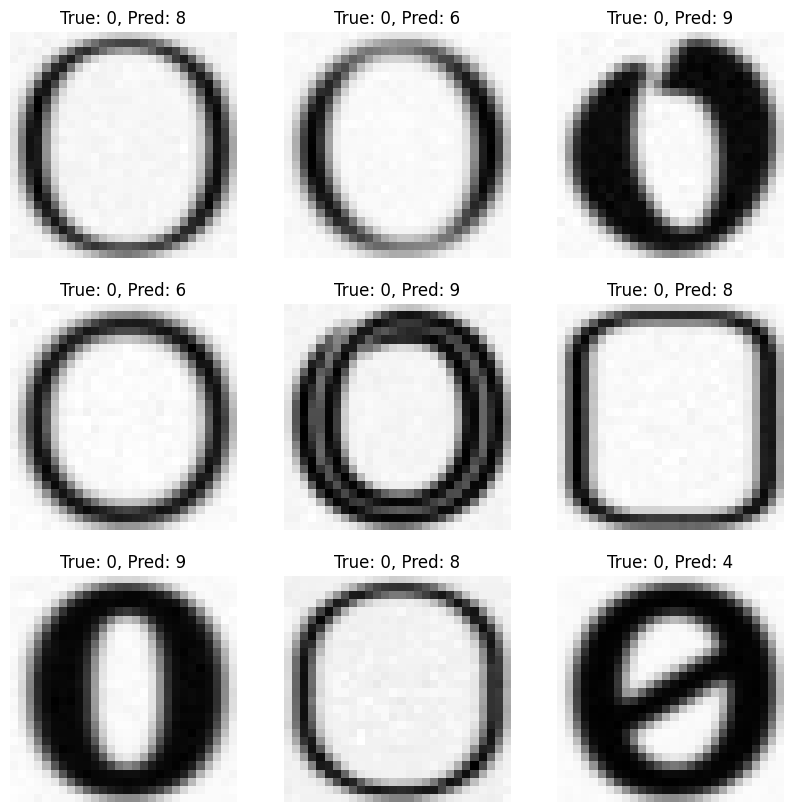

In [17]:
import matplotlib.pyplot as plt

misclassified_indices = np.where(y_pred != y_test)[0]

num_display = 9

plt.figure(figsize=(10, 10))
for i, idx in enumerate(misclassified_indices[:num_display]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[idx].squeeze(), cmap='gray')  
    plt.title(f'True: {y_test[idx]}, Pred: {y_pred[idx]}')
    plt.axis('off')
plt.show()
